# Analysis of US Mines Characteristics

## Analysis Overview

In this analysis, I wanted to look at charactersitcs of currently active mines and generate insights. The main focus was on types of mines, employment, working schedule, and date the status of the mine was updated last.

## Dataset Overview

The dataset lists all Coal and Metal/Non-Metal mines under MSHA's jurisdiction since 1/1/1970. It includes such information as the current status of each mine (Active, Abandoned, NonProducing, etc.), the current owner and operating company, commodity codes and physical attributes of the mine. The dataset consisted of approximately 88,000 observations but the analysis was focused on currently active mines. The currently active mines sub-dataset consists of 6,336 mines.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
mines = pd.read_csv('mines.txt', sep='|', encoding='ISO-8859-1')

In [3]:
# cdata wrangling, convert string values to datetime
mines.CURRENT_STATUS_DT = pd.to_datetime(mines.CURRENT_STATUS_DT)
# convert CURRENT_STATUS_DT datetime data type to just integer year
mines.CURRENT_STATUS_DT = mines.CURRENT_STATUS_DT.dt.year

In [4]:
# wrangling, create a dataframe of active mines
mines_active = mines.query('CURRENT_MINE_STATUS == "Active"').copy()

## Distribution of Employees per Mine

Number of employees per mine in the active mines dataset take on a very large range of values, from 1 to 10,000. Plotted on logarithmic scale, the distribution of employees per mine is very right skewed. This means that currently most of the mines in US are small operations.

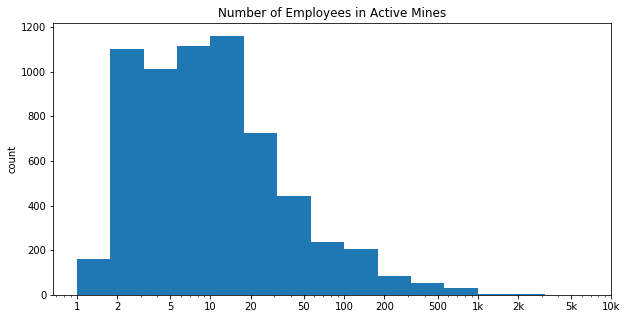

In [6]:
min_number = min(mines_active.NO_EMPLOYEES) 
max_number = max(mines_active.NO_EMPLOYEES)
log_binsize = .25
bin_edges = 10 ** np.arange(np.log10(min_number),
                            np.log10(max_number) + log_binsize,
                            log_binsize)
plt.figure(figsize=(10,5))
plt.hist(data = mines_active, x = 'NO_EMPLOYEES',
         bins = bin_edges)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], 
           ['1', '2', '5', '10', '20', '50', '100', '200', '500', '1k', '2k', '5k', '10k'])
plt.title('Number of Employees in Active Mines')
plt.ylabel('count');

## Total Employment by State

The top three states for employment at mines are Nevada, West Virginia, and Texas.

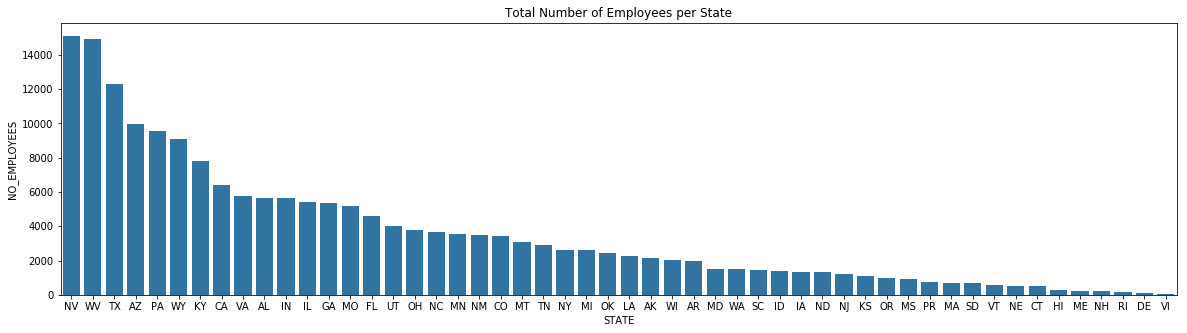

In [15]:
plt.figure(figsize=(20,5))
base_color = sb.color_palette()[0]
g = mines_active.groupby('STATE', as_index = False).sum()
g = g.sort_values(['NO_EMPLOYEES'], ascending = False).reset_index(drop=True)
sb.barplot(data = g, x = 'STATE', y = 'NO_EMPLOYEES',
           color = base_color)
plt.title('Total Number of Employees per State');

## Mining Type vs Type Of Resource

There's about even an distribution of undeground and facility mines for the type of resource mined. For the surface type mines, there's much more metal/non-metal mines.

- 'C' stands for coal mine
- 'M' stands for metal/non-metal mine

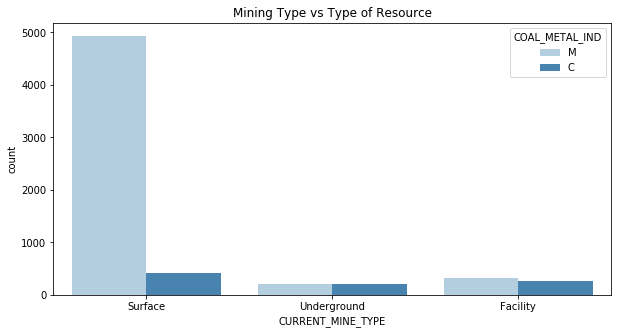

In [13]:
plt.figure(figsize=(10,5))
sb.countplot(data = mines_active, x = 'CURRENT_MINE_TYPE',
             hue = 'COAL_METAL_IND', palette = 'Blues')
plt.title('Mining Type vs Type of Resource');

## Type of Resource by State

There's only a handfull of states that have coal mines. Most of the coal mines are in Pennsylvania, Kentucky, West Virginia, and Virginia. Texas, Pennsylvania, and California have the most number of surface mines.

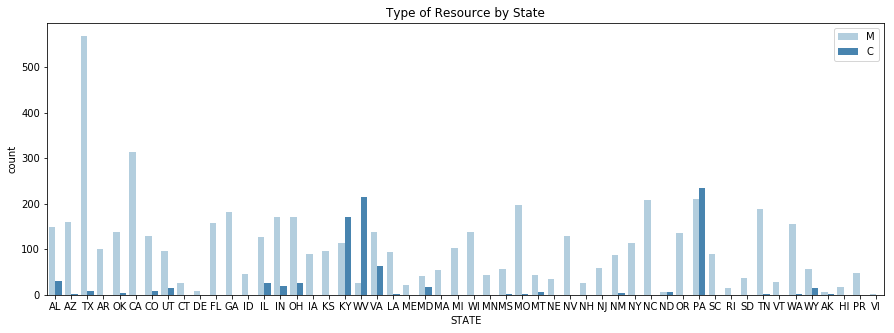

In [29]:
ax = plt.figure(figsize=(15,5))
sb.countplot(data = mines_active, x = 'STATE', 
             hue = 'COAL_METAL_IND',
             palette = 'Blues')
plt.legend(loc='upper right')
plt.title('Type of Resource by State');

## Mine Last Status Update by Resource Type and Operations Type

The mines in the dataset are being updated with most of the updates in the last year. But the distribution of last update dates looks bi-modal, with a high peaks in 2017 and lower peaks in 1977. The coal mines seem to be more up to date in the dataset. Interestingly, there're coal surface mines that are listed as active but haven't been updated since before 1970.

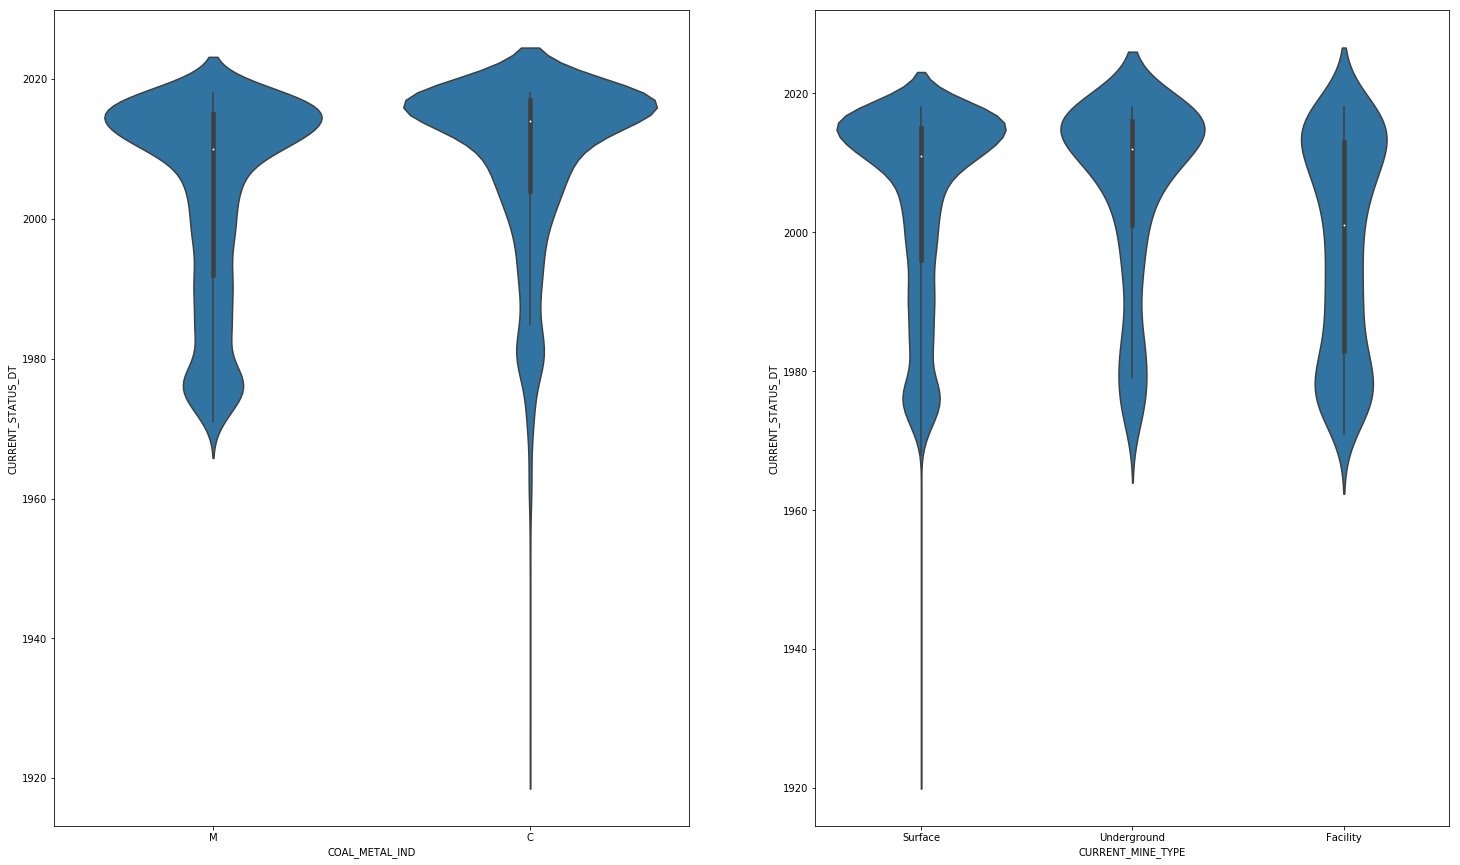

In [35]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,15))
categoric_vars = ('COAL_METAL_IND', 'CURRENT_MINE_TYPE')
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    
    sb.violinplot(data = mines_active, x = var, y = 'CURRENT_STATUS_DT', 
                  ax = ax[i], color = base_color)